### **TransferLearning using Custom Data**

**Importing All Packages:**

In [ ]:
# importing neccessary packages
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf 
from tensorflow import keras

# for splitting dataset into two parts
from tensorflow.keras.preprocessing import image_dataset_from_directory

# importing pretrained model from tensorflow
from tensorflow.keras.applications import ResNet50

# import packages from keras for creating NN
from tensorflow.keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam 

In [ ]:
# loading dataset
from pathlib import Path

# url link
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=url, untar=True) # untar=True mean extract tgz file format to useable
data_dir = Path(data_dir)

In [ ]:
# print path of our dataset
print(data_dir)

/root/.keras/datasets/flower_photos


In [ ]:
# customize the size of the image
IMAGE_SHAPE = (224, 224)

# split dataset into training dataset
train_data = image_dataset_from_directory(directory=data_dir,
                                          seed=123,
                                          validation_split=0.3,
                                          subset="training",
                                          label_mode='categorical',
                                          image_size=IMAGE_SHAPE,
                                          batch_size=32,
                                          shuffle=True)

Found 3670 files belonging to 5 classes.
Using 2569 files for training.


In [ ]:
# split dataset into validation dataset
test_data = image_dataset_from_directory(directory=data_dir,
                                          seed=123,
                                          validation_split=0.3,
                                          subset="validation",
                                          label_mode='categorical',
                                          image_size=IMAGE_SHAPE,
                                          batch_size=32,
                                          shuffle=True)

Found 3670 files belonging to 5 classes.
Using 1101 files for validation.


In [ ]:
# print all classes names in our dataset
class_names = train_data.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### **Fine Tunning our model:**

In [ ]:
# Initializing the model
model = Sequential()

# importing tranfer learning model (ResNet152V2)
pretrained_model = ResNet50(include_top=False,
                               input_shape=(IMAGE_SHAPE+(3,)),
                               weights="imagenet", 
                               pooling="max", 
                               classes=5)

# No need to train the pretrained model just updating the o/p layers 
for layer in pretrained_model.layers:
  layer.trainable=False    

# adding customized layer into pretrained model
model.add(pretrained_model)

# Flatten the model
model.add(Flatten())

# creating a layer
model.add(Dense(units=512, activation="relu", kernel_initializer="he_normal"))

# creating output layer
model.add(Dense(units=5, activation="softmax", kernel_initializer="glorot_normal"))


94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# view summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss="categorical_crossentropy", metrics=["accuracy"])

### **Train the model:**

In [ ]:
# fit dataset with our model
Model= model.fit(train_data, validation_data=(test_data), epochs=100)

Epoch 1/100
81/81 [==============================] - 36s 362ms/step - loss: 4.6175 - accuracy: 0.6863 - val_loss: 0.5661 - val_accuracy: 0.8147
Epoch 2/100
81/81 [==============================] - 27s 327ms/step - loss: 0.3739 - accuracy: 0.8665 - val_loss: 0.6216 - val_accuracy: 0.8165
Epoch 3/100
81/81 [==============================] - 27s 326ms/step - loss: 0.2534 - accuracy: 0.9093 - val_loss: 0.4017 - val_accuracy: 0.8728
Epoch 4/100
81/81 [==============================] - 27s 327ms/step - loss: 0.1703 - accuracy: 0.9416 - val_loss: 0.3618 - val_accuracy: 0.8883
Epoch 5/100
81/81 [==============================] - 27s 326ms/step - loss: 0.1014 - accuracy: 0.9650 - val_loss: 0.3818 - val_accuracy: 0.8810
Epoch 6/100
81/81 [==============================] - 27s 326ms/step - loss: 0.0844 - accuracy: 0.9704 - val_loss: 0.4088 - val_accuracy: 0.8810
Epoch 7/100
81/81 [==============================] - 27s 328ms/step - loss: 0.0662 - accuracy: 0.9763 - val_loss: 0.4608 - val_accuracy:

In [ ]:
Model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

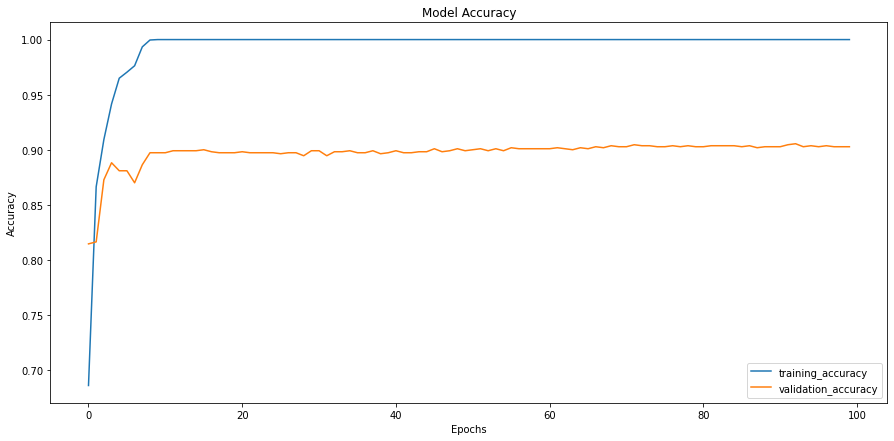

In [ ]:
# Evaluating the model accuracy
plt.figure(figsize=(15,7))
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

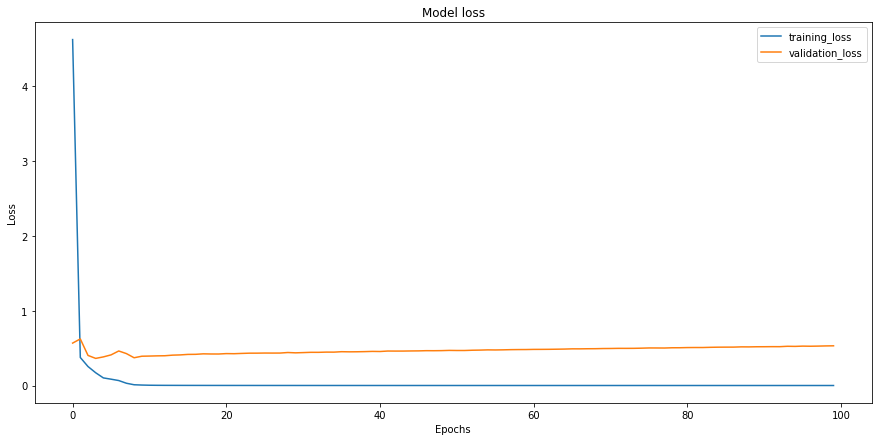

In [ ]:
# Evaluating the Loss
plt.figure(figsize=(15,7))
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['training_loss', 'validation_loss'])
plt.show()